# (1) Control Flow
## If, Elif, Else

Python uses if statements like R, with three main differences.

Instead of curly brackets, you have colons and indents.
You don't put the `if` statement in parentheses.
Instead of `else if`, you have the abbreviated `elif`.

In [ ]:
x = -10

if x > 0:
    print('x is positive!')
elif x == 0:
    print('x is 0!')
else:
    print('x is negative!')

Because there are no brackets like R, Python relies on the indentations to decide what goes in and out of an `if/elif/else` statement. If there are problems with indentations, or if your indentations are not the same number of spaces (let's say, 3 spaces vs. 4 spaces), the statements will not execute. 
<br></br>

### For loops

Also like R, there are `for` and `while` loops. Like R, all for loops in Python are "for-each" loops, meaning you have to go through a list. For example, the following chunk of code prints each element in `a_new_list` on a separate line. Like the `if` statements, you do not use parentheses around the for condition:

In [ ]:
a_new_list = [1, 'fish', 2, 'fish']
for x in a_new_list:
    print(x) 

If you know the certain amount of times you want to repeat something, use the `range()` function like so.

In [ ]:
# this loop will print 10 times
for i in range(10):
    print(f"looping: {i}")

Remember, Python indexes at 0 instead of 1 like R. You'll see it prints 0-9 instead of 1-10. Many other languages like C++ follow this zero-based indexing. 
<br></br>
**Exercise 1.1**

Fill in the ellipses to calculate the mean of the elements in `nums`.

In [1]:
nums = [1,2,3,4,5,6]
total = 0

for i in nums:
    total += i

mean_value = total / len(nums) # DO NOT fill in 6 (use a function instead)

print(f'The mean is {mean_value}!')

The mean is 3.5!


**Exercise 1.2**

Add every element from `a_new_list` onto the end of `num_list` using a `for` loop using `append()` and the `range()` function. Hint: for this to work, you'll have to get the length of `a_new_list`.

In [2]:
a_new_list = [1, 'fish', 2, 'fish']
num_list = [0,1,2,3,4,5,6]

# write code here
for i in range(len(a_new_list)):
    num_list.append(a_new_list[i])
    
print(num_list)

[0, 1, 2, 3, 4, 5, 6, 1, 'fish', 2, 'fish']


**Exercise 1.3** 

Given the following list of strings `string_list`, copy all strings that start with the letter "A" into `starts_A_list` using `append()`. Hint: you can get the first letter of a string just by treating it as a list of characters.

In [ ]:
# example of string indexing
my_string = "Tree"
print(my_string[0])

In [3]:
string_list = ["Apple", "Banana", "Alligator", "Anteater", "Potato", "Water", "Aardvark"]
starts_A_list = []

# write code here
for string in string_list:
    if string[0] == 'A':
        starts_A_list.append(string)

print(starts_A_list)

['Apple', 'Alligator', 'Anteater', 'Aardvark']


### While loops

While loops in Python are the same as in R, except again without curly brackets and with colons instead. Again, like if/elif/else statements and for loops, Python relies on indents to figure out what's in the loop and what isn't. 

In [ ]:
i = 1
while i < 64:
    i *= 2  # note: this is equivalent to writing i = i * 2
    print(i)

# (2) Pandas

The pandas package implements data frames, which are similar to those in R. As usual, we'll have to load it beforehand, so let's do it (`pd` is a standard abbreviation for pandas that you'll see pretty much everywhere pandas is used).

In [4]:
import pandas as pd

## Pandas Series

A pandas `Series` object is in essence, a better, more functional version of the native Python list. Unlike numpy arrays, they can store different data types in the same Series object. Here are a few examples of Series and functions that show what makes them so great.

In [ ]:
my_list = [1,2,4,12]
my_series = pd.Series(my_list)

print(my_series)

print(my_series.loc[my_series > 3]) # [my_series > 3] is a Boolean mask! More on that in a bit

my_char_series = pd.Series(char for char in 'test')
print(my_char_series)

my_string_series = pd.Series(['This is a string', 'This is also a string', 'Yet again, another string', 'lol'])
print(my_string_series.str[5]) # this is a little more advanced than what we're looking at in this course, but basically
# you are using what is called a 'vectorized' operation to get the index=5 (6th element) character in each string

## Pandas DataFrame

A pandas `DataFrame` in essence is the same as any R dataframe but they work a bit differently. Pandas is a package and dataframes aren't part of the base code of Python the same way they are in R.

You still have columns and rows though, which can have integer indices (remember Python is a 0-based indexing language!) 

You can have different columns that contain different data types (try and keep every column to a single data type although you don't necesarrily have to).

You can make a data frame with the `.DataFrame()` function. This will convert a dictionary (of lists, Series (another pandas object), lists, tuples, etc), numpy array, or any other iterable object into a pandas DataFrame object

In [ ]:
# a dictionary with keys (columns) a, b, c, with values numerical values
df1 = pd.DataFrame({
    'a': [0, 1, 2],
    'b': [False, True, True],
    'c': ['This is', 'three different', 'strings!']
})

# a dataframe from a two dimensional array, though its unnamed
df2 = pd.DataFrame([
    [1,2,3,4],
    [2,6],
    ['True', False, True]
])

print(df1)
print('')
print(df2)
# notice how pandas always makes the DataFrame object rectangular, and fills in 
# NaN (this is a pd.NA object and is equivalent to NA in R) for any spots where it is missing data

In general, you can use the same commands implemented in numpy on pandas dataframes. Here are some data attributes that are useful:
* `.index`: This will give you the index of every row.
* `.columns` This will give you the column names.
* `.axes`: This is a list that contains both the indices and columns in that order (i.e. [index, columns]).
* `.shape`: As with numpy, this atrributre is a tuple containing the shape of the dataframe (i.e. rows by columns).
* `.dtypes`: This contains the datatypes in each column of the dataframe.

In [ ]:
print(df1)

print('\n-----------\n')

print(f"Here's the axes (names by row, column):\n{df1.axes}\n")
print(f"Here's the shape:\n{df1.shape}\n")
print(f"Here's the data types in each column:\n{df1.dtypes}\n")

### Accessing Rows/Columns in a DataFrame

Since the DataFrame object isn't built into Python like it is into R, you can't just use [row, column] notation to access different rows or columns.
The best way to access rows and columns in pandas DataFrame objects is using the functions `.loc()`, and `.iloc()`. These functions give a Series object as the return value.

* `.loc()`: This gets values by its name. You need to specify which rows (by index) and columns (by name). Note that you can select multiple columns if you pass a list of column names.
* `.iloc()`: This gets values by its index (hence, index-loc). You don't need to specify both rows and columns -- if you don't, it will default to rows only. (To make your code more readable and to make the syntax easier to remember, it's probably best to specify both anyways).



In [ ]:
print(df1.loc[:,'a'])  # gets every value in column 'a'
print(df1.iloc[:, 2])  # gets every value in column 2, which is also named 'c'
print(df1.iloc[1])     # gets every value in row 1, which is the second row
print(df1.iloc[1, :])  # same as above, but this syntax makes it clearer than the above

Other ways to access values

There are a few other different ways to access rows and columns in pandas DataFrame objects but they aren't always as clear and you should generally try to stick to `.loc()` and `.iloc()` for ease of reading

Using the dot (`.`) to access the attribute directly; for example `df1.a`. This is probably the shortest method (as long as the name of your attribute doesn't have spaces or special characters (e.g. `Name of Gene`, instead of `gene_name`)).

Using single square brackets to get columns, for example `df1['a']`. Note that the name a is a string.

Using double square brackets, for example `df1[['a']]`. Note that this returns a 2D data frame, not a 1D series (which is just a 1D array in pandas). This method has the benefit of being able to select multiple columns, such as by `df1[['a', 'b', 'c']]`.


In [ ]:
print(df1.a)
print(df1['a'])
print(df1[['a']])

# (3) Data Transformations
## Boolean Indexing
As with R, you have the option of selecting rows by boolean indexing by using the loc attribute. As a review, you can apply vectorized comparison operators to an entire 1D pandas array (i.e. a pandas series):

In [ ]:
print(df1.a)
df1.a >= 1

Therefore, you can select rows by putting boolean values into the loc columns.

In [ ]:
df1.loc[df1.a >= 1, 'b']  # gets the column 'b' for every row with a value of 1 or greater in the column 'a'

In [ ]:
Use the following exercise array:

In [5]:
#  feel free to try to understand this code, though by all means it's not expected that you will
df_exercise = pd.DataFrame(
    [[10*j + i for i in range(10)] for j in range(10)],
    columns = [char for char in "abcdefghij"])

**Exercise 3.1**

Select columns b-g and store it as a separate data frame named df_new. Can you think of more than one way to do so?
Filter out rows in df_new where the value in c is not a multiple of 3 (modify df_new). Remember that the modulo (%) operator gets the remainder.
Get the value at index (2, 3). It should be 74.

In [6]:
# write code here

# shown below are equivalent ways of accomplishing the first part
df_new = df_exercise.loc[:, 'b':'g']
df_new = df_exercise.iloc[:, 1:7]

df_new = df_new.loc[df_new.loc[:, 'c'] % 3 == 0, :]
print(df_new.iloc[2, 3])

74


## Transposition
Transposing a DataFrame allows you to switch the columns and rows. This can be useful because a lot of DataFrame methods are operated on each column by default.

In [ ]:
df_exercise.sum() # computes column sums

In [ ]:
df_exercise.T # transposes DataFrame

In [ ]:
df_exercise.T.sum() # computes row sums

## Vectorized Operations
Vectorized operations are not a default feature of Python but similar functionality can be achieved using numpy and pandas. Let's walk through a few use cases:

In [ ]:
array_exercise = np.array(df_exercise)
array_cos = np.cos(array_exercise)
df_exercise.loc[:, :] = array_cos # preserves original index and columns instead of casting as DataFrame

We can do string vectorized operations as well but only on Series

In [ ]:
string_df = pd.DataFrame({'a' : ['string', 'yes', 'hello'], 'b' : ['wow', 'so cool!', 'hiya']})


In [ ]:
string_df.loc[:, 'a'].str.contains('e')

In [ ]:
string_df.loc[:, 'b'].str[::-1]

## Looping Through Values
We can use for loops to go row by row or column by column in our DataFrames. The default action is to loop through columns. Looping through a Series is the exact same as looping through a row or column. In fact, when you access a single row or column, the object you are getting back is actually a Series!

In [ ]:
# These are equivalent!
for col in string_df:
    print(string_df.loc[:, col])

for col in string_df.columns:
    print(string_df.loc[:, col])

To loop through rows, we can loop through the index of the DataFrame

In [ ]:
for row in string_df.index:
    print(string_df.loc[row, :])

## Value Counts
Series.value_counts() is a SUPER important method that can be incredibly useful. Calling it on a Series returns another Series where the index is each unique value in the original Series and the actual value in the Series is the number of times it appeared in the original Series.

In [ ]:
blood_list = ['AB', 'A', 'A', 'O', 'A', 'A', 'AB', 'B', 'B', 'AB']

Say we had a list of blood types. If we wanted to get the number of values of each type, we could loop through it using standard Python syntax:

In [ ]:
for blood_type in set(blood_list):
    print(blood_type, blood_list.count(blood_type))

While this works fine for a small list of 10 blood types, what if we had a list that was hundreds of thousands of values long? We can convert it into a Series and use .value_counts()

In [ ]:
pd.Series(blood_list).value_counts()

## Handling NaNs
For numpy arrays, we can use np.isnan() and for pandas we can use df.isna(), df.dropna(), and df.fillna(). Here are some examples below.

In [ ]:
random_df = pd.DataFrame({'a' : [1, 4, 3], 'b' : [np.nan, 4, 1]})
random_df

In [ ]:
random_df.isna()

In [ ]:
np.isnan(np.array(random_df))

In [ ]:
random_df.dropna(axis=0)

In [ ]:
random_df.dropna(axis=1)

# (4) Supplementary Exercises
These are retired exercises from a previous semester's Python HW. Feel free to attempt them for extra practice if you want!

**Supplementary Exercise 1**
+ Define a function which takes in one input, `n`, and returns one output, `y`.
+ The function should compute the following: Start with the number 100. If the number is divisible by 3, divide by 3. If it is not divisible by 3, add 7. Compute this `n` times. Return the output, `y`, of the nth computation. For example:
> + n=0, return 100
> + n=1, return 107
> + n=2, return 114
> + n=3, return 38 etc
+ Create a list, `x_vals`, with the values 1-10
+ Create a list, `y_vals`, with the output of the function for each x value.
+ Plot `x_vals` versus `y_vals` in a line plot in the color red

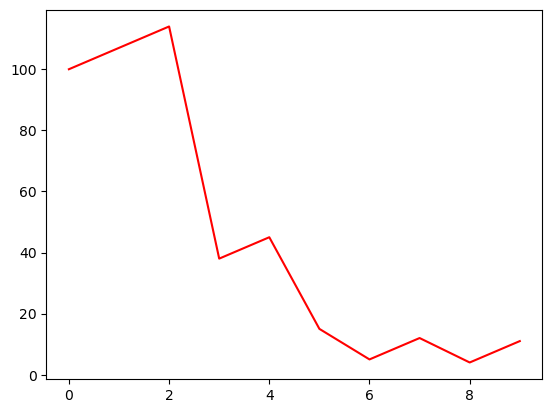

In [7]:
# write code here
import matplotlib.pyplot as plt

def my_func(n):
    value = 100
    for i in range(n):
        if value % 3 == 0:
            value /= 3
        else:
            value += 7
    return value

x_vals = []
y_vals = []

for i in range(10):
    x_vals.append(i)
    y_vals.append(my_func(i))
    
plt.plot(x_vals, y_vals, color='red')

**Supplementary Exercise 2**
</br>Here is a predefined DataFrame. Explore the structure of it to understand how to complete the next parts.
+ For each row in the DataFrame, compute the mean of the values in the row. 
+ Count the number of values in the row that are greater than the mean and add the count to `count_list`.
+ Find the number of different values in your list (hint: you can use the set() wrapper to convert a list to a set) and call it `num_bins`.
+ Create a histogram of your `count_list` with the argument `bins=num_bins` and the color purple.

In [8]:
import random
example_df = pd.DataFrame(
    [[random.randint(1,100)+j*5 for i in range(10)] for j in range(1000)], 
    columns=[i for i in range(10)])

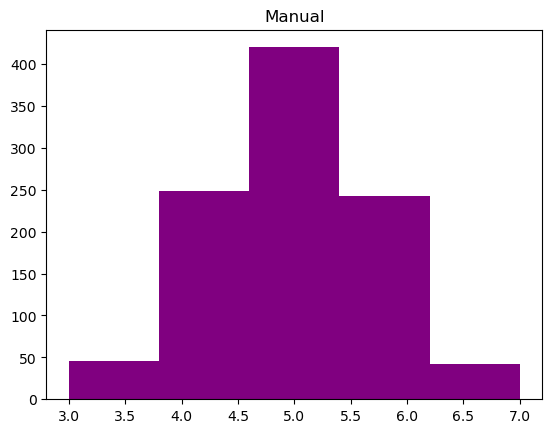

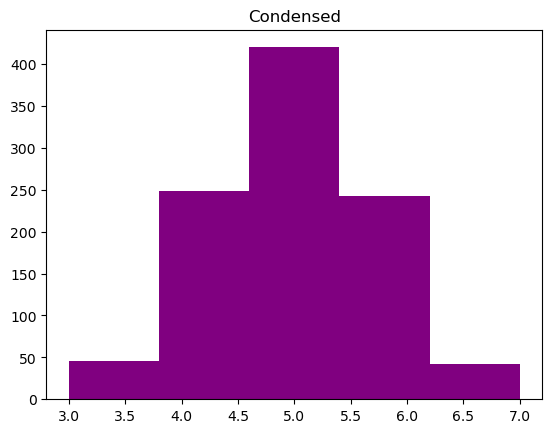

In [9]:
# write code here
import numpy as np

# Method 1 - looping through rows and taking count manually
count_list=[]
for row in example_df.index:
    row_mean = np.mean(example_df.loc[row, :])
    num_above_mean = sum(example_df.loc[row, :] > row_mean)
    count_list.append(num_above_mean)

num_bins = len(set(count_list))
plt.hist(count_list, bins=num_bins, color='purple')
plt.title('Manual')
plt.show()

# Method 2 - condensed using pandas
row_means = example_df.T.mean()
count_list = (example_df.T > row_means).sum()
num_bins = len(count_list.unique())

plt.hist(count_list, bins=num_bins, color='purple')
plt.title('Condensed')
plt.show()

**Supplementary Exercise 3 (Extra Credit)**
</br> The code below will import the `iris` dataset, a commonly used dataset in pattern recognition. It contains 150 measurements from three different types of irises, *Iris setosa*, *Iris versicolor*, and *Iris virginica*. These are denoted with the numbers 0, 1, and 2 respectively in the DataFrame. The measurements include sepal length, sepal width, petal length, and petal width.
+ Create a single figure with 4 scatterplots comparing all four combinations of length and width.
+ Color the points based on their species. 
+ Add an appropriate title, axis labels, and legend. 
+ Determine which combination of measurements is best able to differentiate the species of iris and explain why.

In [10]:
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data[:, :4], columns=iris.feature_names)
iris_df = pd.concat([iris_df, pd.Series(iris.target, name='species')], axis=1)

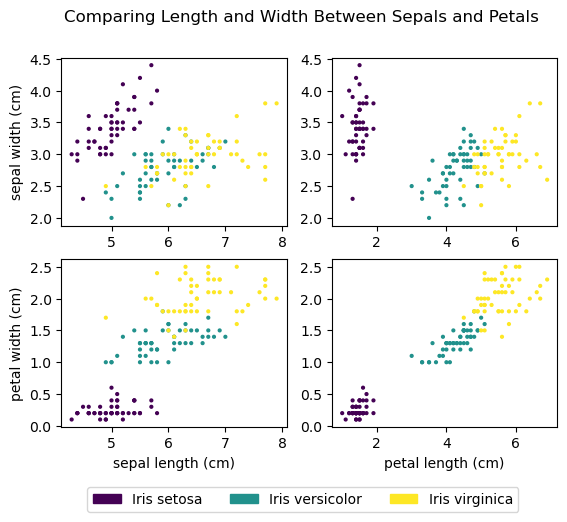

In [11]:
# write code here
# write code here
import matplotlib.patches as mpatches

fig, axs = plt.subplots(2, 2)

axs[0][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df.species, s=4)
axs[0][0].set_ylabel('sepal width (cm)')

axs[0][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 1], c=iris_df.species, s=4)

axs[1][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 3], c=iris_df.species, s=4)
axs[1][0].set_xlabel('sepal length (cm)')
axs[1][0].set_ylabel('petal width (cm)')

axs[1][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=iris_df.species, s=4)
axs[1][1].set_xlabel('petal length (cm)')

fig.suptitle('Comparing Length and Width Between Sepals and Petals')

setosa = mpatches.Patch(color='#440154', label='Iris setosa')
versicolor = mpatches.Patch(color='#21918c', label='Iris versicolor')
virginica = mpatches.Patch(color='#fde725', label='Iris virginica')

fig.legend(handles=[setosa, versicolor, virginica], bbox_to_anchor=[0.85,0], fancybox=True, ncols=3)

In [ ]:
# petal length vs petal width gives the clearest demarcation